# **Previsão de Churn dos clientes**

## Contexto:

### O que é churn de clientes?

Churn rate é o indicador que mede a rotatividade dos clientes de uma empresa. Ou seja, ele indica o percentual de clientes que pararam de fazer negócios com a organização dentro de um período. 

Quando um cliente interrompe sua relação comercial com uma empresa ele deixa de contribuir para a receita dela. Logo, o impacto direto do churn rate é, justamente, a queda no faturamento. 

### Qual o objetivo do projeto?

O objetivo do projeto e desenvolver um modelo que consiga atraves das features(características) passadas para ele, saber se o cliente vai dar churn ou não, ou seja, e um problema de classificação para saber quantos clientes vamos perde. 

### Fonte de dados

Minha fonte de dados e um arquivo csv com informações sobre os clientes.

### Expectativas e Considerações

Espero conseguir criar algo que ajude as empresas, claro que essa primeira abordagem que vamos fazer aqui vai ser algo relavativamente simples, mas vai ser como um primeiro passo para coisas maiores, como a melhoria deste proprio modelo ou a criações de outros, em posse desses modelos as empresas vão ser capazes de se preparem e tentarem trazer o cliente(que foi apontado pelo modelo) de volta antes que ele saia, isso com certeza vai ajudar as empresa.

---

### Etapas do Projeto:
- Etapa 1: Importar as bibliotecas necessarias
    - Nessa etapa vamos importas as bibliotecas necessarias para criamos nosso codigo.
- Etapa 2: Extração dos dados
    - Nessa etapa vamos importar nossos dados
- Etapa 3: Limpeza dos dados.
    - Nessa etapa vamos ver se existe valores nulos, se os tipos estão errados, ver se todas as colunas são necessarias, fazer uma limpeza mesmo.
- Etapa 4: Exploração dos dados
     - Com os dados limpos, vamos agora plotar diversos graficos para termos uma ideia geral de como os nossos dados estão distribuidos e já temos uma ideia do resultado
- Etapa 5: Encondig dos dados
    - Aqui nessa etapa nos vamos realizar o encondig dos nossos dados, vamos normalizados para ajudar o modelo a entender melhor e também vamos transformar as colunas categorias em numericas para que o meu modelo passa ler.
- Etapa 6: Aplicação do modelo
    - Nessa etapa vamos aplicar os modelos escolhidos anteriomente na importação dos dados e comparar com metricas de avaliação para verificamos qual se saiu melhor
- Etapa 7: Escolha do melhor modelo e verificar se possivel melhorado.
    - Aqui vamos ver se podemos melhorar o nosso modelo, pois caso estiver bom para nós, não vamos precisar melhora-lo
- Etapa 8: Conclusão do projeto
    - Aqui eu vou conclui um projeto com minhas considerações, falar se consegui executar o que queria, e como foi desenvolver o projeto.

---

#### Etapa 1: Importar as bibliotecas necessarias.

In [1]:
#Bibiotecas padrões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---
#Bibliotecas de Machine Learning


#---
#Bibliotecas de encondig dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
#---
#Bibliotecas de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
#---
#Bibliotecas que dividem e testam o modelo.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import scikitplot as skplt
#---
#Filtrar avisos
import warnings
warnings.filterwarnings('ignore')

---

#### Etapa 2: Extração de dados

In [2]:
#importando dados
df = pd.read_csv('Churn Modeling.csv')

In [3]:
#Primeiras entradas do Df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Etapa 3: Limpeza dos dados

In [4]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Verificando se existe valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Verificando a destribuição da nossa variavel alvo
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
#Informações estatisticas do meu df
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Verificando os valores unicos nas colunas.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Como podemos notar temos 3 colunas que não vão nos ajudar no decorrer do nosso projeto, a coluna Row Number, Customer Id e Surname não tem relação nenhuma com meu objetivo, e por causa disso serão removidas.

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

---

- E assim terminamos a limpeza dos dados, como podemos ver não existia valores nulos e a tipografia dos dados estão corretas, a unica coisa que fizemos foi remover colunas irrelevantes para o nosso objetivo.

---

#### Etapa 4: Exploração dos dados

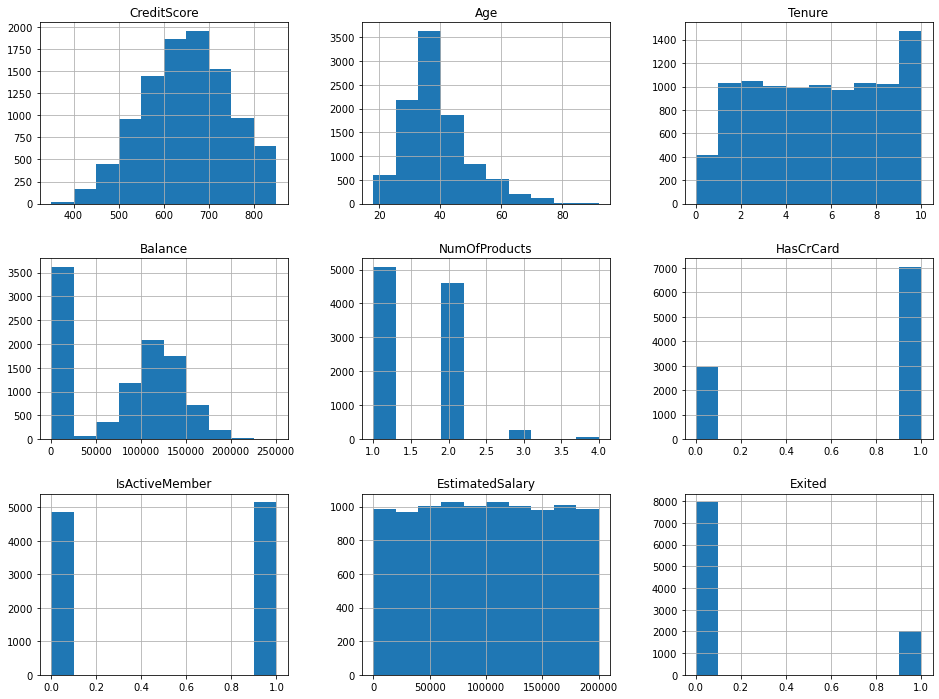

In [10]:
#Verificando a distribuição das nossas variaveis
df.hist(figsize=(16,12));

- Como podemos notar, parece que as coisas estão normais, não tem nenhum valor extramente alto que apague os outros isso é bom, claro que existe outliers, mas como são poucas informações, vamos deixar assim mesmo pois acredito que não vá impactar no meu modelo, claro que no futuro eu posso reconsiderar.

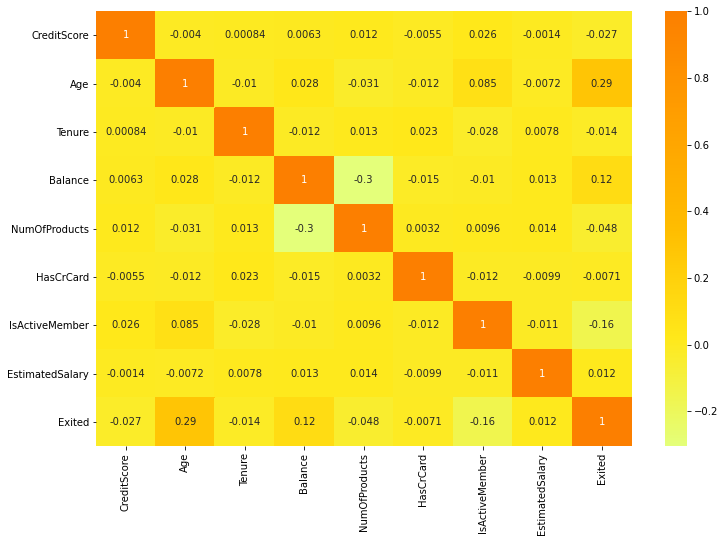

In [11]:
#Verificando a correlação das variaveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Wistia',annot=True);

- Como podemos notar, não existe nad mas a que chame muito a atenção, claro que podemos notar um correlação negativa entre Balance e numero de produtos, e também temos uma relação pequena entre a saida da pessoa e a sua idade, acredito que a feature de idade vai ser importante para o modelo.

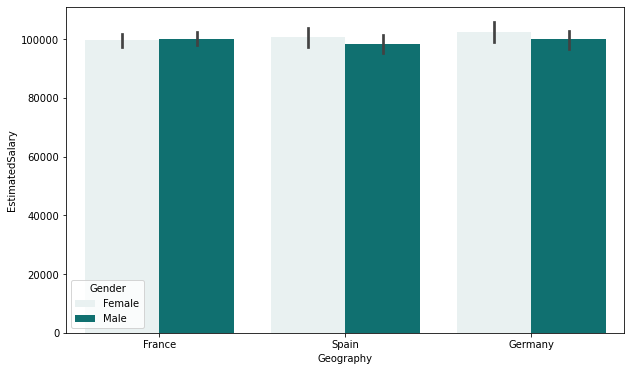

In [12]:
#Verificando o salario estimado por geografica filtrado por genero
plt.figure(figsize=(10,6))
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender', color='teal',data=df);

- Podemos notar que as mulheres ganham mais que os homens nos paises da espanha e alemanha, enquanto na fraça os homens ganham um pouco mais.

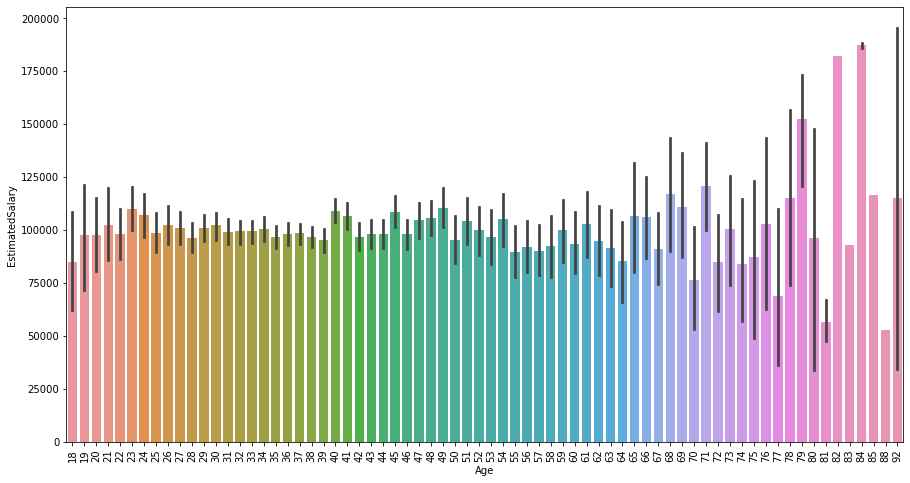

In [13]:
#Salario estimado por idade
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',data=df);

- Como podemos notar, a maior concentração de valores de salario estimado está entre 80 e 90 anos.

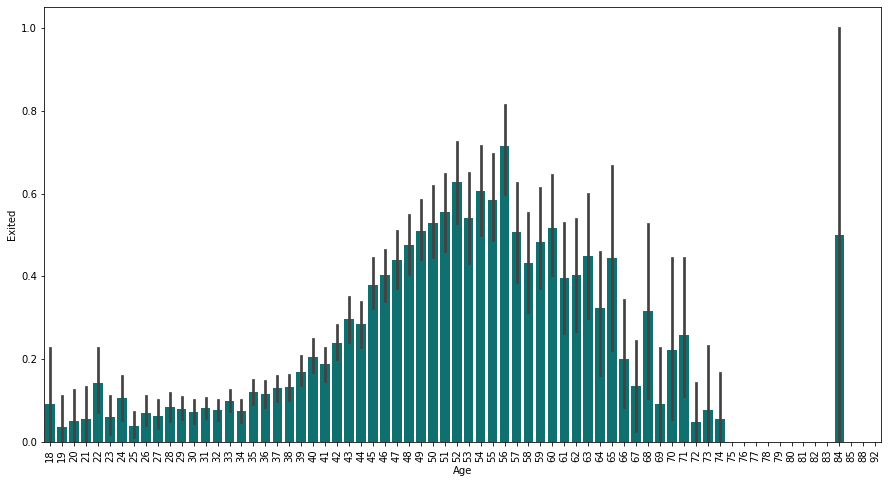

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Exited',color='teal',data=df);

- Como podemos notar, temos um maior pico entre 50 e 55 anos, acredito que e nessa idada que a pessoa tende a não querer gastar tanto mais pois já está pensando na aponsetadoria.

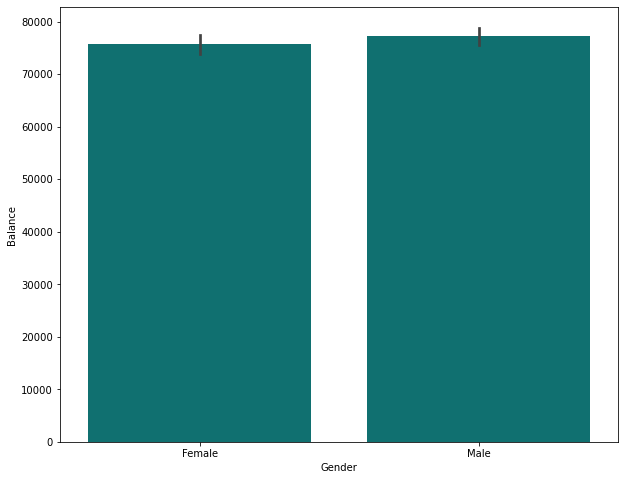

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Balance',color='teal',data=df);

- Como pode notar o grafico dos homens está um pouco acima dos da mulheres.

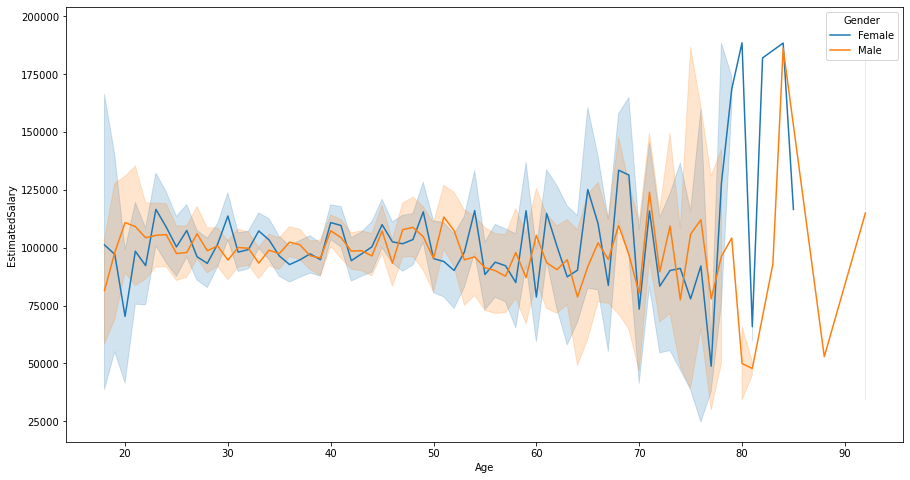

In [16]:
#Analisando salario estimado por idade e filtrando por genero
plt.figure(figsize=(15,8))
sns.lineplot('Age',y='EstimatedSalary',hue='Gender',data=df);

- Como podemos ver o desenhar do grafico mostra altas e baixas do salario estimado por idade, e temos podemos observa a confirmação do outro grafico pois nesse podemos ver claramente como o salario dos homens e mulheres estão proximos, menos no final perto dos 80-90 em que as mulheres tem um pico e um homens uma queda.

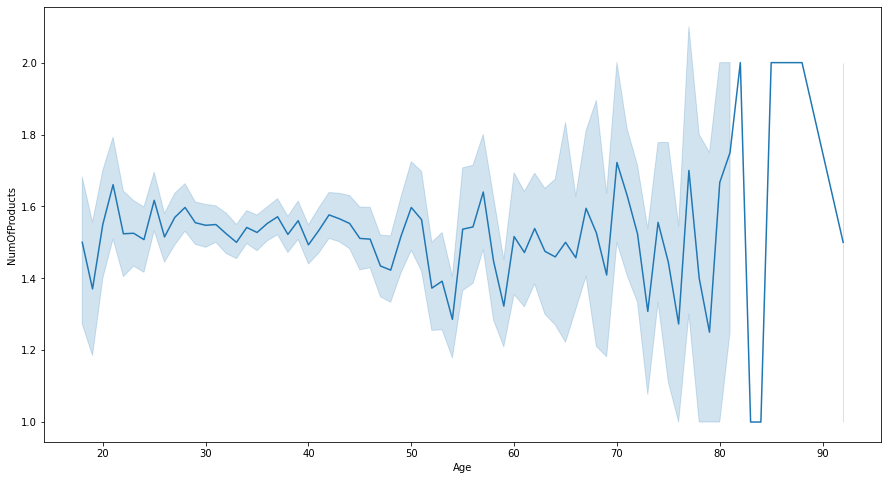

In [17]:
#Analisando a idade e o numero de produtos
plt.figure(figsize=(15,8))
sns.lineplot('Age',y='NumOfProducts',data=df);

- Como podemos notar, a informação dos graficos acima então validadas pois, com podemos notar, entre 50 e 57 anos e onde tivemos quedas brucas, e de 83 abaixa só que depois aumente tudo de novo.

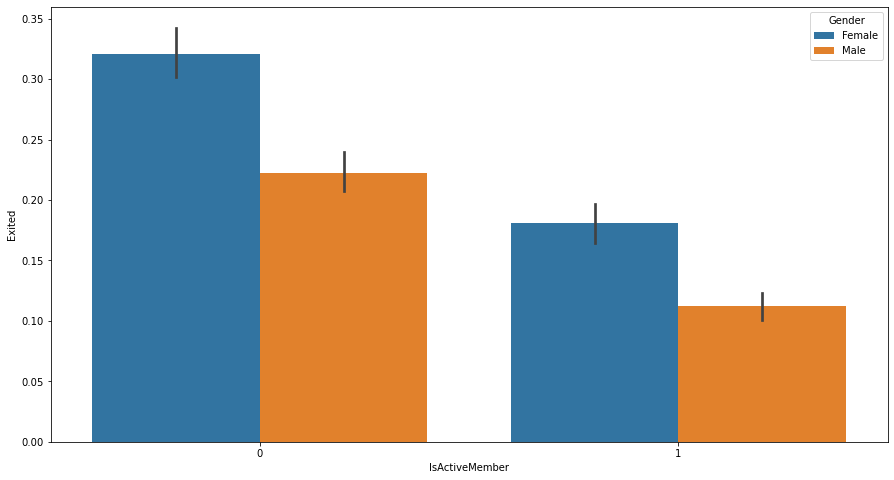

In [18]:
#Vendo se o membro é ativo e analisando por saida e filtrado por genero
plt.figure(figsize=(15,8))
sns.barplot('IsActiveMember',y='Exited',hue='Gender',data=df);

- Como podemos notar o grafico de membros ativos são menores do que o de membros não ativos, isso pode dizer que quando o cliente não é ativo, ele tem grande chance de sair da empresa.

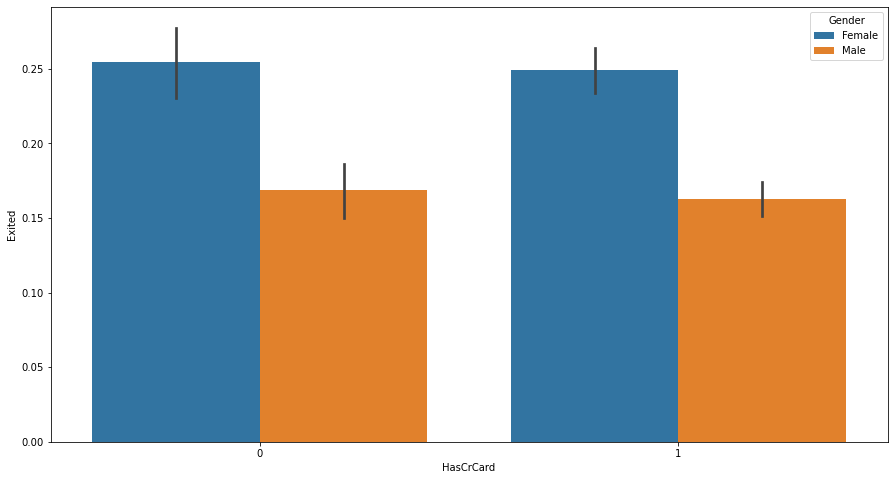

In [19]:
#Fazendo a mesma verificação acima so que dessa vez por cartão de credito sim ou não
plt.figure(figsize=(15,8))
sns.barplot('HasCrCard',y='Exited',hue='Gender',data=df);

- Aqui nos podemos ver que tem relação os graficos são praticamente identicos.

---

- E assim terminamos a nossa analise exploratoria de dados, vizemos muitos graficos que tenho certeza que vão nos ajudar a entender o que está puxando e saber qual e a coluna mais importante pro modelo.

---

#### Etapa 5: Encondig dos dados

- Label encondig

In [20]:
#Colunas que vão ser modificadas
colunas = ['Geography','Gender']

#instacia
le = LabelEncoder()

#Transformando em valores
for i in colunas:
    df[i] = le.fit_transform(df[i])
#exibindo 
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

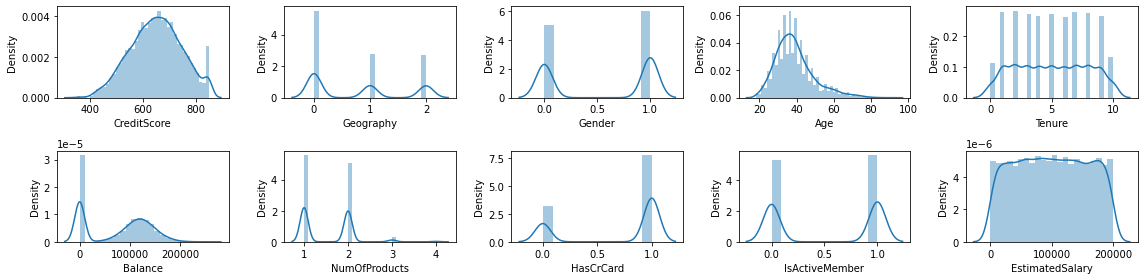

In [21]:
#Distribution plot
rows = 2
cols = 5

#Definindo o subplot
fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(16,4))
col = df.columns

#Plotando para diversas features
index=0
for i in range(rows):
    for y in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][y])
        index = index+1
plt.tight_layout()

- Normalizando dados.
    - Vamos deixar todos com o menos numero de casas decimais, isso ajuda o modelo a aprender.

In [22]:
#Criando uma copia do df
copia_df = df.copy()

#Normalizando as colunas numericas

#Obtendo as colunas númericas.
colunas_num = copia_df.drop('Exited', axis=1).select_dtypes(exclude='object').columns

#Noermalizando
copia_df[colunas_num] = StandardScaler().fit_transform(copia_df[colunas_num].values)

In [23]:
copia_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
5,-0.057205,1.515067,0.912419,0.484225,1.032908,0.597329,0.807737,0.646092,-1.030670,0.863650,1
6,1.774174,-0.901886,0.912419,1.056346,0.687130,-1.225848,0.807737,0.646092,0.970243,-1.565487,0
7,-2.840488,0.306591,-1.095988,-0.946079,-0.350204,0.618019,4.246377,0.646092,-1.030670,0.334854,1
8,-1.547141,-0.901886,0.912419,0.484225,-0.350204,1.050820,0.807737,-1.547768,0.970243,-0.437329,0
9,0.346319,-0.901886,0.912419,-1.136786,-1.041760,0.931463,-0.911583,0.646092,0.970243,-0.493230,0


- Balanceando os nossos valores de Y, pois existem mais valores False do que True, e para que o nosso modelo consiga aprender de uma maneira mais precisa vai ser necessario balancear.

In [24]:
#Separando entre X e Y
x= copia_df.drop('Exited',axis=1)
y= copia_df['Exited']

#Separando entre treino e teste
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)

---

#### Etapa 6: Aplicação do modelo

In [25]:
#Avalia o modelo
def Avaliarmodelo(nome_modelo, y_test, previsao):
    #sk = skplt.metrics.plot_confusion_matrix(y_test, previsao, normalize=True) #heatmap, vamos ver apenas para o modelo campeão.
    cm = classification_report(y_test, previsao, digits=4)
    ac = accuracy_score(y_test,previsao)
    roc = roc_auc_score(y_test, previsao)
    return print(f'O Modelo: {nome_modelo}\nRelatório de Classificação:\n{cm}\nAcurácia: {ac:.4f}\nAUC: {roc:.4f}\n')

In [26]:
#Criando uma instancia para os modelos
modelo_mtnb = MultinomialNB()
modelo_KN = KNeighborsClassifier()
modelo_dc = DecisionTreeClassifier()
modelo_ex = ExtraTreeClassifier()
modelo_lisv = LinearSVC()
modelo_ga = GaussianNB()
modelo_rf = RandomForestClassifier()
modelo_lc = LogisticRegression(C=0.1)
modelo_xg = XGBClassifier()

#Criando um dicionario para acessar de maneira mais facil

modelos = {
    'RandomForest Classifier':modelo_rf,
    #'Decision Tree Classifier':modelo_dc,
    #'Extra Tree Classifier':modelo_ex,
    #'Logistic Regression': modelo_lc,
    #'Multinomial NB':modelo_mtnb,
    #'Gaussian NB':modelo_ga,
    #'KNeighbors Classifier':modelo_KN,
    #'Linear SVC':modelo_lisv,
    #'XGB Classifier':modelo_xg
}

In [27]:
#Percorrendo minha lista de modelos
for nome_modelo,Modelo in modelos.items():
    #Treinando modelo
    Modelo.fit(x_train, y_train)
    
    #Prevendo com o modelo
    previsao = Modelo.predict(x_test)
    
    #Avaliando o modelo
    Avaliarmodelo(nome_modelo,y_test,previsao)
    
    #Previsoes erradas.
    print('Previsões erradas sobre o Total')
    print((y_test !=previsao).sum(), '/',((y_test==previsao).sum()+(y_test !=previsao).sum()))
    
    print('-'*100)

O Modelo: RandomForest Classifier
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8670    0.9582    0.9103      1578
           1     0.7422    0.4502    0.5605       422

    accuracy                         0.8510      2000
   macro avg     0.8046    0.7042    0.7354      2000
weighted avg     0.8406    0.8510    0.8365      2000

Acurácia: 0.8510
AUC: 0.7042

Previsões erradas sobre o Total
298 / 2000
----------------------------------------------------------------------------------------------------


- O modelo campeão entre todos os outros foi o modelo de Random Forest que chegou a 85 de Acurácidade.

---

#### Etapa 7: Escolha do melhor modelo e verificar se possivel melhorado.

In [28]:
#Função que vai criar um grafico com as features usadas pelo modelo

def Importancia_coluna(modelo,coluna):
    #Dados
    modelo_importances = pd.DataFrame(modelo.feature_importances_,coluna.columns)
    #Ordenando
    modelo_importances.sort_values(by=0,ascending=False,inplace=True)
    #Grafico
    grafico = plt.figure(figsize=(12,6))
    sns.barplot(x= modelo_importances.index,y= modelo_importances[0])

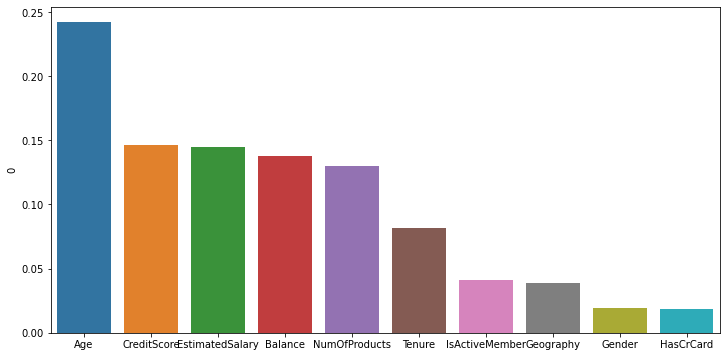

In [29]:
Importancia_coluna(modelo_rf,x_train)

- Como podemos notar, todas as colunas tem uma relevancia para o modelo, e como eu imaginava pois no grafico de heatmap mostrava uma relação entre saida é idade, e podemos ver que as outras features também tem uma certa relaçao.

- Para melhorar o nosso modelo será necessario analisamos se ele precisa mesmo de todas as features, pois, quanto mais simples o modelo melhor, e como podemos ver que HascrCard, tém pouca importancia então eu vou excluir para ver como o modelo se sai.

---

In [30]:
#Colocando tudo em uma celula só para testar as modificações


#Criando um novo df para excluir as colunas
testa_modelo = copia_df.copy()

testa_modelo.drop('HasCrCard',axis=1,inplace=True)


#Separando entre X e Y e entre treino e teste.
x = testa_modelo.drop('Exited',axis=1)
y = testa_modelo['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.2)


modelo_rf = RandomForestClassifier(criterion='entropy', max_depth=894, max_features='sqrt',min_samples_split=14)

#Treinando modelo
modelo_rf.fit(x_train, y_train)
    
#Prevendo com o modelo
previsao = modelo_rf.predict(x_test)
    
#Avaliando o modelo
Avaliarmodelo(nome_modelo,y_test,previsao)
    
#Previsoes erradas.
print('Previsões erradas sobre o Total')
print((y_test !=previsao).sum(), '/',((y_test==previsao).sum()+(y_test !=previsao).sum()))
    
print('-'*100)

O Modelo: RandomForest Classifier
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8707    0.9645    0.9152      1578
           1     0.7778    0.4645    0.5816       422

    accuracy                         0.8590      2000
   macro avg     0.8242    0.7145    0.7484      2000
weighted avg     0.8511    0.8590    0.8448      2000

Acurácia: 0.8590
AUC: 0.7145

Previsões erradas sobre o Total
282 / 2000
----------------------------------------------------------------------------------------------------


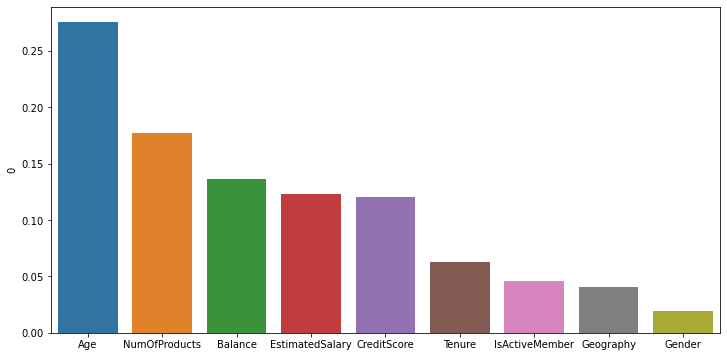

In [31]:
Importancia_coluna(modelo_rf,x_train)

- Como podemos ver no resultado, ele melhorou e o mais importante e que o modelo ficou mais simples, com menos uma coluna agora podemos saber se a pessoa vai fazer um churning ou não, pois quanto mais simples o modelo, melhor! so que claro sem perde a precisão dele, nesse caso o nosso melhorou.

---

- Outra coisa que podemos fazer é retiramos também a coluna de Gender pois semelhante a coluna de HasCrCard ela também não tem tanta importancia para o meu modelo, então vou retirar.

In [32]:
#Colocando tudo em uma celula só para testar as modificações


#Criando um novo df para excluir as colunas
testa_modelo = copia_df.copy()

testa_modelo.drop(['HasCrCard','Gender'],axis=1,inplace=True)


#Separando entre X e Y e entre treino e teste.
x = testa_modelo.drop('Exited',axis=1)
y = testa_modelo['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,test_size=0.2)


modelo_rf = RandomForestClassifier(criterion='entropy', max_depth=894, max_features='sqrt',min_samples_split=14)

#Treinando modelo
modelo_rf.fit(x_train, y_train)
    
#Prevendo com o modelo
previsao = modelo_rf.predict(x_test)
    
#Avaliando o modelo
Avaliarmodelo(nome_modelo,y_test,previsao)
    
#Previsoes erradas.
print('Previsões erradas sobre o Total')
print((y_test !=previsao).sum(), '/',((y_test==previsao).sum()+(y_test !=previsao).sum()))
    
print('-'*100)

O Modelo: RandomForest Classifier
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8712    0.9728    0.9192      1578
           1     0.8193    0.4621    0.5909       422

    accuracy                         0.8650      2000
   macro avg     0.8452    0.7174    0.7550      2000
weighted avg     0.8602    0.8650    0.8499      2000

Acurácia: 0.8650
AUC: 0.7174

Previsões erradas sobre o Total
270 / 2000
----------------------------------------------------------------------------------------------------


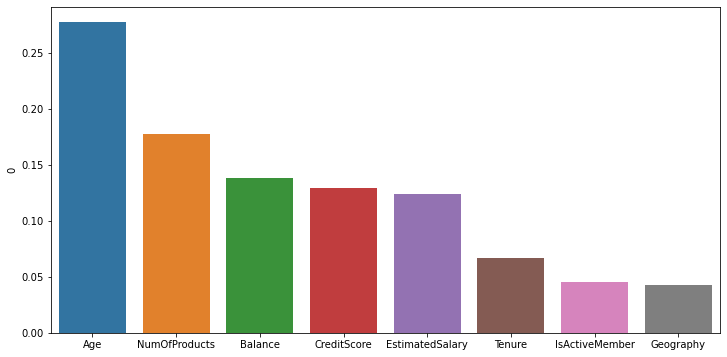

In [33]:
Importancia_coluna(modelo_rf,x_train)

- Como podemos notar depois de removermos as duas colunas, o nosso modelo melhou na Acurácia e também na diminuição de erros previstos, notamos assim que mesmo com menos colunas o nosso modelo consegue ter um melhor desempenho, isso e bom por que o deixa mais simples, e se algum dia fomos levavo para frente em um deploy, vai ser necessarios menos colunas para termos uma boa analise.

---

#### Etapa 8: Conclusão do projeto

- Conclusão:
    - Bem, eu gostei do projeto, conseguimos criar um modelo relativamente preciso e simples, pois ele consegue com menos colunas ter uma Acurácidade de 86%, e isso me deixa sadisfeito com o projeto, pois sinto que consegui completar meu objetivo, eu consegui chegar até onde queria, isso é otimo.